In [48]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

In [18]:
df=pd.read_csv('House_specifications.csv')

In [19]:
df

,Id,ClassOfMSSsub,Zoningof MS,LotFrontage,LotOFArea,Street,Alley,LotOFShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [20]:
for i in df.columns:
    if df[i].isna().sum()>0:
        print(i,'-',df[i].isna().sum())

LotFrontage - 259
Alley - 1369
MasVnrType - 8
MasVnrArea - 8
BsmtQual - 37
BsmtCond - 37
BsmtExposure - 38
BsmtFinType1 - 37
BsmtFinType2 - 38
Electrical - 1
FireplaceQu - 690
GarageType - 81
GarageYrBlt - 81
GarageFinish - 81
GarageQual - 81
GarageCond - 81
PoolQC - 1453
Fence - 1179
MiscFeature - 1406


In [60]:
df.fillna(0,inplace=True)
#actually i can fill na values with other tehcniques, but in this task it's not mandatory I guess,
#I filled null values with 0 because of 'feature importance' technique below

So, in this dataframe we have 1460 rows and these columns: 
PoolQC, Fence, MiscFeature, FireplaceQU,Alley columns have many null values , we can drop them

In [34]:
df.drop(columns=['PoolQC','Fence','MiscFeature','FireplaceQu','Alley'],axis=1,inplace=True)

In [46]:
a=df.select_dtypes(include=['object']).columns.tolist()
a

['Zoningof MS',
 'Street',
 'LotOFShape',
 'LandContour',
 'Utilities',
 'LotOFConfig',
 'SlopeOFland',
 'Neighbor',
 'firstCondition',
 'secondCondition',
 'TypeofBLDG',
 'StyleOFhouse',
 'Styleofroof',
 'RoofofMatl',
 'Exteriorfirst',
 'Exteriorsecond',
 'MasVnrType',
 'ExterQualifaction',
 'ExterCondition',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'SaleType',
 'SaleCondition']

In [49]:
categorical_cols = a

# instantiate labelencoder object
le = LabelEncoder()

# apply le on categorical feature columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: le.fit_transform(col)) 
ohe = OneHotEncoder()

#One-hot-encode the categorical columns.
#Unfortunately outputs an array instead of dataframe.
array_hot_encoded = ohe.fit_transform(df[categorical_cols])

#Convert it to df
data_hot_encoded = pd.DataFrame(array_hot_encoded, index=df.index)

#Extract only the columns that didnt need to be encoded
data_other_cols = df.drop(columns=categorical_cols)

#Concatenate the two dataframes : 
data_out = pd.concat([data_hot_encoded, data_other_cols], axis=1)

In [35]:
import seaborn as sns
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm')


,Id,ClassOfMSSsub,LotFrontage,LotOFArea,OverallQualification,OverallCondition,Builtdate,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
Id,1.000000,0.011156,-0.010601,-0.033226,-0.028365,0.012609,-0.012713,-0.021998,-0.050298,-0.005024,-0.005968,-0.007940,-0.015415,0.010496,0.005590,-0.044230,0.008273,0.002289,-0.020155,0.005587,0.006784,0.037719,0.002951,0.027239,-0.019772,0.000072,0.016570,0.017634,-0.029643,-0.000477,0.002889,-0.046635,0.001330,0.057044,-0.006242,0.021172,0.000712,-0.021917
ClassOfMSSsub,0.011156,1.000000,-0.386347,-0.139781,0.032628,-0.059316,0.027850,0.040581,0.022936,-0.069836,-0.065649,-0.140759,-0.238518,-0.251758,0.307886,0.046474,0.074853,0.003491,-0.002333,0.131608,0.177354,-0.023438,0.281721,0.040380,-0.045569,0.085072,-0.040110,-0.098672,-0.012579,-0.006100,-0.012037,-0.043825,-0.026030,0.008283,-0.007683,-0.013585,-0.021407,-0.084284
LotFrontage,-0.010601,-0.386347,1.000000,0.426095,0.251646,-0.059213,0.123349,0.088866,0.193458,0.233633,0.049900,0.132644,0.392075,0.457181,0.080177,0.038469,0.402797,0.100949,-0.007234,0.198769,0.053532,0.263170,-0.006069,0.352096,0.266639,0.070250,0.285691,0.344997,0.088521,0.151972,0.010700,0.070029,0.041383,0.206167,0.003368,0.011200,0.007450,0.351799
LotOFArea,-0.033226,-0.139781,0.426095,1.000000,0.105806,-0.005636,0.014228,0.013788,0.104160,0.214103,0.111170,-0.002618,0.260833,0.299475,0.050986,0.004779,0.263116,0.158155,0.048046,0.126031,0.014259,0.119690,-0.017784,0.190015,0.271364,-0.024947,0.154871,0.180403,0.171698,0.084774,-0.018340,0.020423,0.043160,0.077672,0.038068,0.001205,-0.014261,0.263843
OverallQualification,-0.028365,0.032628,0.251646,0.105806,1.000000,-0.091932,0.572323,0.550684,0.411876,0.239666,-0.059119,0.308159,0.537808,0.476224,0.295493,-0.030429,0.593007,0.111098,-0.040150,0.550600,0.273458,0.101676,-0.183882,0.427452,0.396765,0.547766,0.600671,0.562022,0.238923,0.308819,-0.113937,0.030371,0.064886,0.065166,-0.031406,0.070815,-0.027347,0.790982
OverallCondition,0.012609,-0.059316,-0.059213,-0.005636,-0.091932,1.000000,-0.375983,0.073741,-0.128101,-0.046231,0.040229,-0.136841,-0.171098,-0.144203,0.028942,0.025494,-0.079686,-0.054942,0.117821,-0.194149,-0.060769,0.012980,-0.087001,-0.057583,-0.023820,-0.324297,-0.185758,-0.151521,-0.003334,-0.032589,0.070356,0.025504,0.054811,-0.001985,0.068777,-0.003511,0.043950,-0.077856
Builtdate,-0.012713,0.027850,0.123349,0.014228,0.572323,-0.375983,1.000000,0.592855,0.315707,0.249503,-0.049107,0.149040,0.391452,0.281986,0.010308,-0.183784,0.199010,0.187599,-0.038162,0.468271,0.242656,-0.070651,-0.174800,0.095589,0.147716,0.825667,0.537850,0.478954,0.224880,0.188686,-0.387268,0.031355,-0.050364,0.004950,-0.034383,0.012398,-0.013618,0.522897
YearRemodAdd,-0.021998,0.040581,0.088866,0.013788,0.550684,0.073741,0.592855,1.000000,0.179618,0.128451,-0.067759,0.181133,0.291066,0.240379,0.140024,-0.062419,0.287389,0.119470,-0.012337,0.439046,0.183331,-0.040581,-0.149598,0.191740,0.112581,0.642277,0.420622,0.371600,0.205726,0.226298,-0.193919,0.045286,-0.038740,0.005829,-0.010286,0.021490,0.035743,0.507101
MasVnrArea,-0.050298,0.022936,0.193458,0.104160,0.411876,-0.128101,0.315707,0.179618,1.000000,0.264736,-0.072319,0.114442,0.363936,0.344501,0.174561,-0.069071,0.390857,0.085310,0.026673,0.276833,0.201444,0.102821,-0.037610,0.280682,0.249070,0.252691,0.364204,0.373066,0.159718,0.125703,-0.110204,0.018796,0.061466,0.011723,-0.029815,-0.005965,-0.008201,0.477493
BsmtFinSF1,-0.005024,-0.069836,0.233633,0.214103,0.239666,-0.046231,0.249503,0.128451,0.264736,1.000000,-0.050117,-0.495251,0.522396,0.445863,-0.137079,-0.064503,0.208171,0.649212,0.067418,0.058543,0.004262,-0.107355,-0.081007,0.044316,0.260011,0.153484,0.224054,0.29697

We can delete columns which have no correlation with saleprice, also we can delete some columns which they have strong correlation(>0.8), because when we make our model these columns can cause bad accuracy, so one of them is enough.
We see from this graph that 'OverallQualification','LotFrontage','GrLivArea','GarageCars','GarageArea','Mosold' and etc. have higher correlation with saleprice

Also we have another technique called 'Feature Importance' in order to find the feature importance of each feature of our dataset by using the feature importance property of the model. We can select any number of important features by changing nlargest value.

[3.03233525e-02 1.51262749e-02 8.83434549e-03 2.66561337e-02
 2.72354823e-02 2.87159918e-04 1.35305783e-02 6.52973790e-03
 4.49895936e-05 1.57464502e-02 3.80824456e-03 2.20630813e-02
 8.89081955e-03 7.07808352e-04 6.99991303e-03 1.25192989e-02
 2.02496489e-02 1.58264503e-02 2.58504291e-02 2.59665300e-02
 1.14497630e-02 1.09122370e-03 1.77097031e-02 1.87983479e-02
 1.44666593e-02 1.90315778e-02 9.17414292e-03 7.64662702e-03
 1.10312961e-02 1.26185634e-02 6.77420607e-03 1.63840609e-02
 2.01040948e-02 2.49706045e-02 7.72873001e-03 6.96930339e-03
 2.75272746e-02 2.69728055e-02 1.40901568e-03 1.58609199e-02
 3.14366983e-03 5.30353255e-03 2.81400250e-02 1.67630364e-02
 1.27086490e-03 2.86456422e-02 1.46274427e-02 4.26770487e-03
 9.32980824e-03 1.07270879e-02 1.67711827e-02 2.04100996e-03
 1.26051575e-02 2.23987585e-02 4.91958629e-03 1.50849551e-02
 1.18421278e-02 2.45430427e-02 1.59840972e-02 1.19677263e-02
 2.67663801e-02 4.43700410e-03 3.65867394e-03 4.77660503e-03
 2.12435687e-02 2.200654

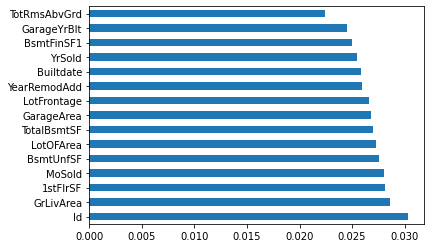

In [79]:
import pandas as pd
import numpy as np
X = df.iloc[:,0:75]  #independent columns
y = df.iloc[:,-1]    #target column saleprice
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(15).plot(kind='barh')
plt.show()


In [86]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [87]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [88]:
reg = LinearRegression().fit(X_train, y_train)

In [89]:
reg.score(X_train, y_train)

0.8417809482765148

So, I applied linear regression algorithm.

In [91]:
y_pred=reg.predict(X_test)

In [92]:
from sklearn.metrics import r2_score
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [94]:
r2_valid = r2_score(y_test, y_pred)
mae_valid = mean_absolute_error(y_test, y_pred)
evs_valid = explained_variance_score(y_test, y_pred, multioutput='uniform_average')
rmse_valid = np.sqrt(mean_squared_error(y_test, y_pred))

print('R2 Valid:',r2_valid)
print('EVS Valid:', evs_valid)
print('MAE Valid:', mae_valid)
print('RMSE Valid:',rmse_valid)


R2 Valid: 0.8474498584712712
EVS Valid: 0.8484043200210919
MAE Valid: 21898.798171057613
RMSE Valid: 32626.817050273698
